In [14]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import pprint

sys.path.append('..')

from facerec.facerec import *

pprint.pprint(sys.path)

['/home/ito/facerec/notebooks',
 '/home/ito/.vscode-server/extensions/ms-toolsai.jupyter-2021.11.1001550889/pythonFiles',
 '/home/ito/.vscode-server/extensions/ms-toolsai.jupyter-2021.11.1001550889/pythonFiles/lib/python',
 '/usr/lib/python38.zip',
 '/usr/lib/python3.8',
 '/usr/lib/python3.8/lib-dynload',
 '',
 '/home/ito/facerec/.venv/lib/python3.8/site-packages',
 '/home/ito/facerec/.venv/lib/python3.8/site-packages/IPython/extensions',
 '/home/ito/.ipython',
 '..',
 '..',
 '..',
 '..']


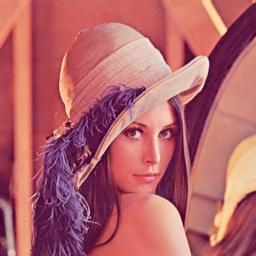

In [9]:
from PIL import Image
im = Image.open('../data/lena.jpg')
im

(256, 256, 3)


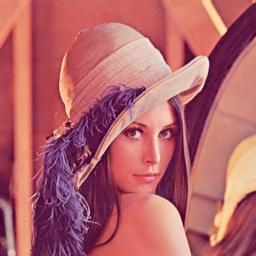

In [10]:
def read_img(file: str) -> np.ndarray:
    return np.array(Image.open(file))


img = read_img('../data/lena.jpg')
print(img.shape)

pil_img = Image.fromarray(img)
# pil_img.save('../data/temp/lena_save_pillow.jpg')
pil_img


In [11]:
# def rgb2hsv(rgb: np.ndarray):
rgb = img
input_shape = rgb.shape
rgb = rgb.reshape(-1, 3)
r, g, b = rgb[:, 0], rgb[:, 1], rgb[:, 2]

maxc = np.maximum(np.maximum(r, g), b)
minc = np.minimum(np.minimum(r, g), b)

v = 100 * maxc // 255

deltac = maxc - minc
s = 100 * deltac // maxc
s[maxc == 0] = 0

h = np.empty_like(v)
deltac[deltac == 0] = 1  # ゼロ除算を避けるために代入。後で当該の要素は上書きされる。
h[maxc == r] = 60 * (g[maxc == r] - b[maxc == r]) / deltac[maxc == r]
h[maxc == g] = 60 * (b[maxc == g] - r[maxc == g]) / deltac[maxc == g] + 120
h[maxc == b] = 60 * (r[maxc == b] - g[maxc == b]) / deltac[maxc == b] + 240
h[minc == maxc] = 0

hsv_img = np.dstack([h, s, v]).reshape(input_shape)
hsv_img

array([[[2, 0, 0],
        [2, 0, 0],
        [2, 0, 0],
        ...,
        [0, 0, 0],
        [2, 0, 0],
        [2, 1, 0]],

       [[2, 0, 0],
        [2, 0, 0],
        [2, 0, 0],
        ...,
        [0, 0, 0],
        [1, 0, 0],
        [0, 1, 0]],

       [[1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        ...,
        [0, 0, 0],
        [2, 0, 0],
        [0, 0, 0]],

       ...,

       [[1, 1, 0],
        [1, 1, 0],
        [2, 1, 0],
        ...,
        [0, 0, 0],
        [0, 1, 0],
        [1, 1, 0]],

       [[1, 0, 0],
        [1, 1, 0],
        [2, 1, 0],
        ...,
        [1, 0, 0],
        [0, 1, 0],
        [2, 0, 0]],

       [[1, 0, 0],
        [0, 2, 0],
        [2, 2, 0],
        ...,
        [0, 1, 0],
        [2, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [12]:
hsv = hsv_img
input_shape = hsv.shape
hsv = hsv.reshape(-1, 3)
h, s, v = hsv[:, 0], hsv[:, 1], hsv[:, 2]

maxc = np.round(255 * v / 100).astype(int)
minc = np.round(maxc - maxc * s / 100).astype(int)

i = h // 60
deltac = maxc - minc
maxc, minc = maxc.reshape(-1, 1), minc.reshape(-1, 1)
deltac, h = deltac.reshape(-1, 1), h.reshape(-1, 1)
x1 = deltac * np.abs(120 - h) // 60 + minc
x2 = deltac * np.abs(240 - h) // 60 + minc

rgb = np.zeros_like(hsv)
rgb[i == 0] = np.hstack([maxc, deltac * h // 60 + minc, minc])[i == 0]
rgb[i == 1] = np.hstack([x1, maxc, minc])[i == 1]
rgb[i == 2] = np.hstack([minc, maxc, x1])[i == 2]
rgb[i == 3] = np.hstack([minc, x2, maxc])[i == 3]
rgb[i == 4] = np.hstack([x2, minc, maxc])[i == 4]
rgb[(i == 5) | (i == 6)] = np.hstack([maxc, minc, deltac * (360 - h) // 60] + minc)[(i == 5) | (i == 6)]
rgb[s == 0] = np.hstack([maxc, maxc, maxc])[s == 0]

rgb.reshape(input_shape)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

0 0 128 128


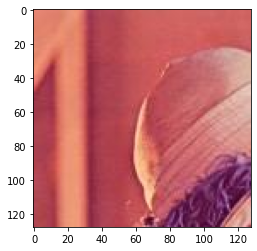

128 0 128 128


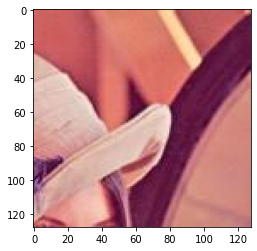

0 128 128 128


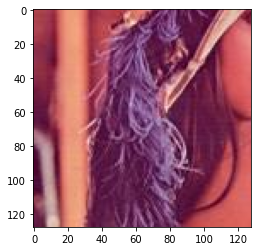

128 128 128 128


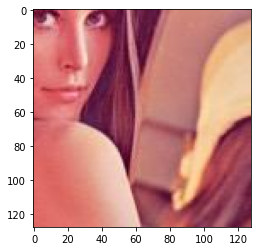

(4, 360)


In [13]:
h, w, _ = img.shape
# print(img.shape)
num_split = 2
split_hists = np.empty((num_split ** 2, 360))  # num_split^2行360列の行列を確保
count = 0

for h_count in range(num_split):
    pos_h = h // num_split * h_count
    for w_count in range(num_split):
        pos_w = w // num_split * w_count
        im_trim = trim(img, pos_w, pos_h, w // num_split, h // num_split)
        print(pos_w, pos_h, w // num_split, h // num_split)
        hist, _ = np.histogram(rgb2hsv(im_trim)[:, :, 0].ravel(), range=(0, 360), bins=360, density=True)
        split_hists[count, :] = hist
        count += 1
        plt.imshow(im_trim)
        plt.show()

print(split_hists.shape)